

### Датасет 2 https://www.kaggle.com/lodetomasi1995/income-classification 


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from pprint import pformat
plt.style.use('ggplot')

from sklearn import metrics

In [ ]:
import os
os.chdir("D:\ml\exam")

df = pd.read_csv('income_evaluation.csv',names = ['age','workclass','fnlwgt','education','education-num',
                'marital-status','occupation','relationship','race','sex','capital-gane','capital-loss','hours-per-week',
                 'native-country','income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gane,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape[0] # количество данных в наборе 

32561

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gane    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Целевая переменная - income
### Таким образом, решается задача бинарной классификации: <=50K или >50K

In [ ]:
df['income'].unique() # целевая переменная

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
for i in df.columns:
    print(f'Количество уникальных значений для {i}: {len(df[i].unique())}')

Количество уникальных значений для age: 73
Количество уникальных значений для workclass: 9
Количество уникальных значений для fnlwgt: 21648
Количество уникальных значений для education: 16
Количество уникальных значений для education-num: 16
Количество уникальных значений для marital-status: 7
Количество уникальных значений для occupation: 15
Количество уникальных значений для relationship: 6
Количество уникальных значений для race: 5
Количество уникальных значений для sex: 2
Количество уникальных значений для capital-gane: 119
Количество уникальных значений для capital-loss: 92
Количество уникальных значений для hours-per-week: 94
Количество уникальных значений для native-country: 42
Количество уникальных значений для income: 2


In [ ]:
for col in df.columns:
    print('Уникальные значения для',col,':',df[col].unique())

Уникальные значения для age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Уникальные значения для workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Уникальные значения для fnlwgt : [ 77516  83311 215646 ...  34066  84661 257302]
Уникальные значения для education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Уникальные значения для education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Уникальные значения для marital-status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Уникальные значения для 

### Видно, что есть неизвестные данные со знаком вопроса ' ?' в столбцах 'workclass', 'occupation', 'native-country', исправляем это

In [ ]:
df[df == ' ?'] = np.nan 

In [ ]:
# количество отсутствующих данных
df.isna().sum() 

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gane         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

<AxesSubplot:>

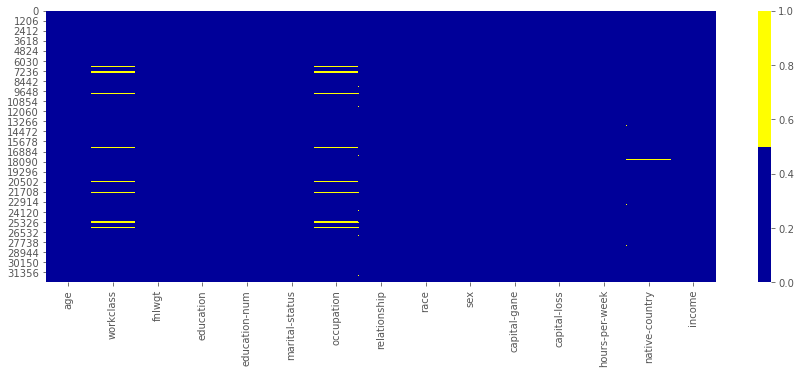

In [ ]:
cols = df.columns 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
plt.rcParams['figure.figsize'] = (15,5)
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

### замена ? на моду

In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# количество отсутствующих данных
df.isna().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gane      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gane,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Замена значений income на числовые значения: ' >50K' : 1, ' <=50K' : 0

In [ ]:
df['income'] = df.income.map({' >50K':1, ' <=50K':0})

In [ ]:
df.groupby('income').describe()

age                                                       fnlwgt  \
          count       mean        std   min   25%   50%   75%   max    count   
income                                                                         
0       24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0  24720.0   
1        7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0   7841.0   

                      ... capital-loss         hours-per-week             \
                mean  ...          75%     max          count       mean   
income                ...                                                  
0       190340.86517  ...          0.0  4356.0        24720.0  38.840210   
1       188005.00000  ...          0.0  3683.0         7841.0  45.473026   

                                                
              std  min   25%   50%   75%   max  
income                                          
0       12.318995  1.0  35.0  40.0  40.0  99.0  
1       11.012971  1.0  40.0  40.0  50.0  99.0  

[2 rows x 48 columns]

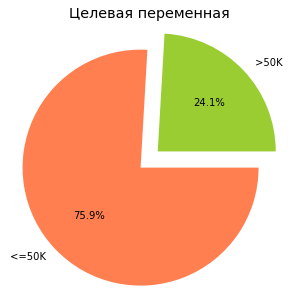

In [ ]:
labels = [' <=50K',' >50K']
x = [df['income'].value_counts()[0], df['income'].value_counts()[1]] 

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(x, labels=labels, explode = (0.3, 0),autopct='%1.1f%%', colors = ['coral','yellowgreen'], 
        radius = 1.5, counterclock = False)
ax1.axis('equal')
plt.title('Целевая переменная')
plt.show()

### Количество людей с доходом больше 50 т составляет только 24,1%

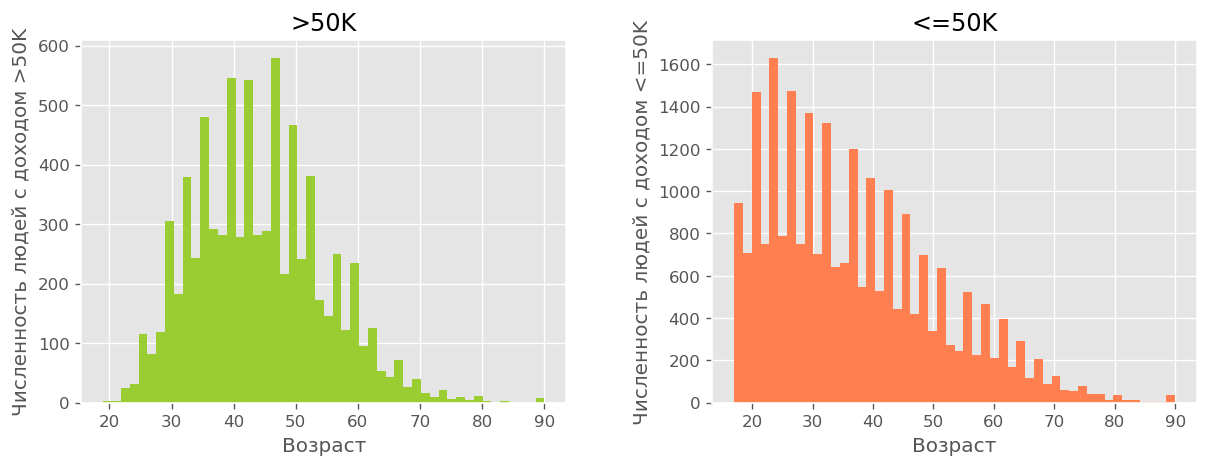

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

df[df.income==1].hist(column='age', bins=50,ax=ax[0],color = 'yellowgreen')
ax[0].set(xlabel = 'Возраст',ylabel = 'Численность людей с доходом >50K',title = '>50K')
df[df.income==0].hist(column='age', bins=50,ax=ax[1],color = 'coral')
ax[1].set(xlabel = 'Возраст',ylabel = 'Численность людей с доходом <=50K',title = '<=50K');

### Видно, что в большинстве доход >50K у людей в возрасте от 35 до 50
### А <=50K у людей более молодых. При этом также помним, что их количество в разы превышает кол-во людей с доходом >50K

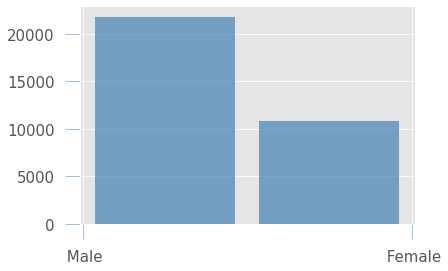

In [ ]:
# построение гистограммы
plt.hist(df['sex'], bins = len(df.groupby(['sex'])),color = 'steelblue', alpha=0.7, rwidth=0.85)
plt.tick_params( length = 15,   width = 0.5,   color = 'steelblue',pad = 10,   labelsize = 15)  
plt.show()

#### Видно, что большинство данных описывает доход людей мужского пола 

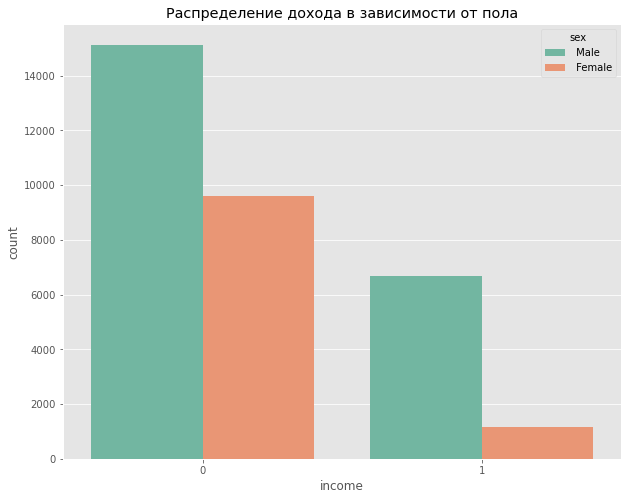

In [ ]:
f,ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=df,palette="Set2")
ax.set_title("Распределение дохода в зависимости от пола")
plt.show()

### Успешных женщин (>50K) гораздо меньше, чем мужчин

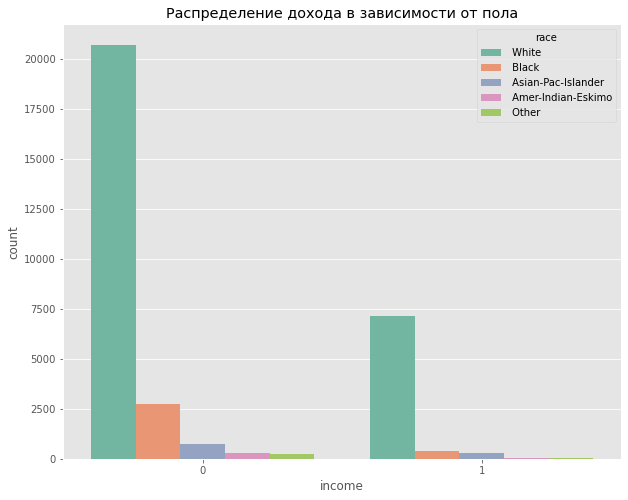

In [ ]:
f,ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df,palette="Set2")
ax.set_title("Распределение дохода в зависимости от пола")
plt.show()

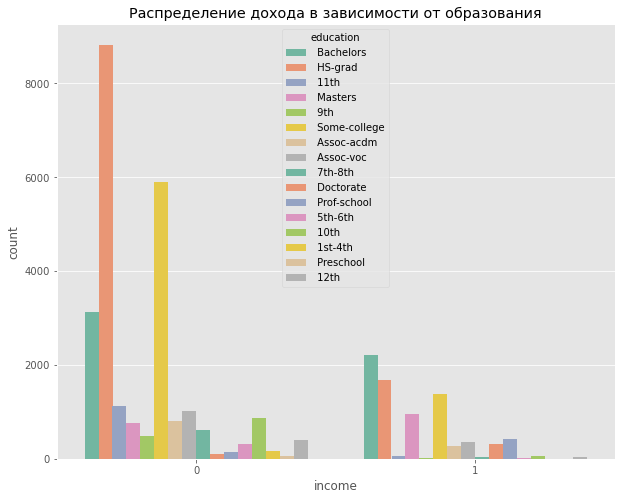

In [ ]:
f,ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="education", data=df,palette="Set2")
ax.set_title("Распределение дохода в зависимости от образования")
plt.show()

У людей, зарабатывающих >50K, в большинстве есть степень бакалавра или они закончили какой-либо колледж 
А с доходом <50 большинство имеет только общее среднее образование

<AxesSubplot:>

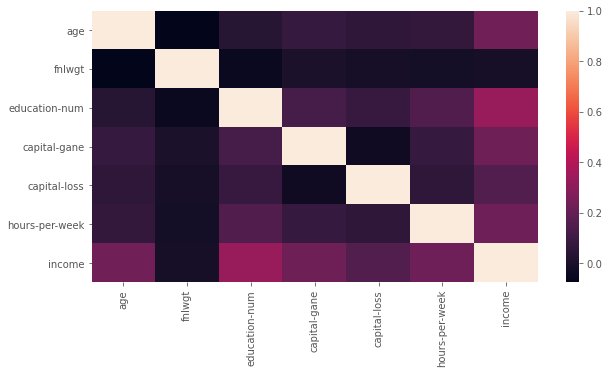

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df.corr(), ax=ax)


### Оценка распределения рабочих часов в неделю

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

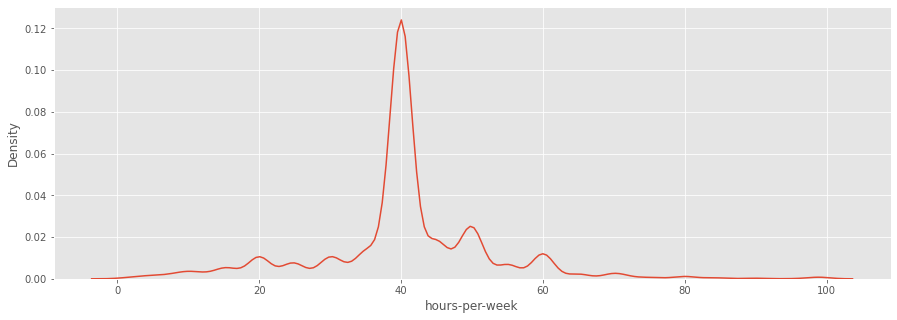

In [ ]:
import seaborn as sns

sns.distplot(df['hours-per-week'], hist=False, kde=True)

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gane,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


### устранение аномалий 
#### hours-per-week: max = 99, что нереально

In [ ]:
df['hours-per-week'] = df['hours-per-week'].map(lambda x: 40 if x>40 else x)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gane,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### Работа с категориальными данными

In [ ]:
categorical_columns= [column for column in df.columns if df[column].dtype == 'object']
for column in categorical_columns:
    print('Признак: {}, кол-во уникальных значений: {}'.format(column,df[column].nunique()))
    print('Уникальные значения: ')
    print(df[column].value_counts(), '\n')

Признак: workclass, кол-во уникальных значений: 8
Уникальные значения: 
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

Признак: education, кол-во уникальных значений: 16
Уникальные значения: 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

Признак: marital-status, кол-во уникальных значений: 7
Уникальные значения: 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 W

In [ ]:
# признак sex, можно самостоятельно
df['sex']=df['sex'].map({' Male': 1, ' Female': 0})

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex                int64
capital-gane       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [ ]:
# encode
categorical_columns= [column for column in df.columns if df[column].dtype == 'object']
from sklearn import preprocessing
for feature in categorical_columns:
        le = preprocessing.LabelEncoder()
        df[feature] = le.fit_transform(df[feature])

In [ ]:
# # масштабирование
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [ ]:
# разбиение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
X = df.drop(['income'], axis=1)
y = df.income
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Модель

In [ ]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gane,capital-loss,hours-per-week,native-country
19749,34,5,56460,11,9,2,4,5,4,0,0,2179,12,38
1216,48,5,243631,15,10,2,2,0,0,1,7688,0,40,38
27962,23,6,56402,15,10,2,9,0,4,1,0,0,30,38
23077,56,1,255406,11,9,0,3,1,4,0,0,0,40,38
10180,17,3,297246,1,7,4,8,3,4,0,0,0,9,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,3,359461,9,13,2,2,0,4,1,0,0,40,38
5390,31,3,147215,2,8,0,7,4,4,0,0,0,21,38
860,18,3,216284,1,7,4,0,3,4,0,0,0,20,38
15795,50,5,54261,11,9,2,4,0,4,1,0,0,40,38


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy score:',accuracy_score(y_test, y_pred))

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print('ROC AUC:', roc_auc_score(y_test, y_pred_prob))

Accuracy score: 0.8012079025488791
ROC AUC: 0.7131695676797749


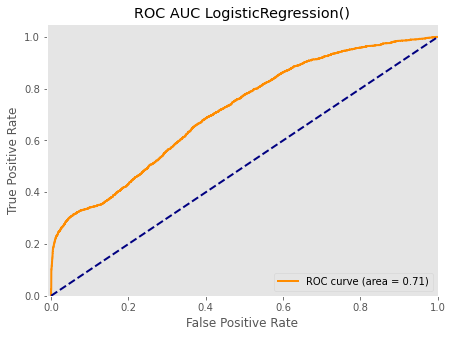

In [ ]:
from sklearn.metrics import roc_curve
plt.rcParams['figure.figsize'] = (7,5)
probs = logreg.predict_proba(X_test)
probs = probs[:, 1]
fpr , tpr , _ = roc_curve(y_test, probs)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC AUC {logreg}')
plt.legend(loc="lower right")
plt.grid()

Качество модели хорошее. Также можно попробовать его улучшить с помощью нормализации 